# Tesla (TSLA) Stock Price prediction using Facebook Prophet

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

In [3]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet


## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [22]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [5]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default = 'colab'

## Importing the Dataset & Exploring it

In [35]:
df = pd.read_csv('TSLA.csv')

In [ ]:
#read_csv function from pandas

In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-24,164.649994,165.649994,158.610001,162.550003,162.550003,140006600
1,2023-04-25,159.820007,163.470001,158.750000,160.669998,160.669998,121999300
2,2023-04-26,160.289993,160.669998,153.139999,153.750000,153.750000,153364100
3,2023-04-27,152.639999,160.479996,152.369995,160.190002,160.190002,127015200
4,2023-04-28,160.899994,165.000000,157.320007,164.309998,164.309998,122515800
...,...,...,...,...,...,...,...
248,2024-04-18,151.250000,152.199997,148.699997,149.929993,149.929993,96098800
249,2024-04-19,148.970001,150.940002,146.220001,147.050003,147.050003,86005100
250,2024-04-22,140.559998,144.440002,138.800003,142.050003,142.050003,107097600
251,2024-04-23,143.330002,147.259995,141.110001,144.679993,144.679993,106808100


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,220.640151,224.803716,216.422094,220.714664,220.714664,1.174129e+08
std,37.534486,38.035017,36.918710,37.505995,37.505995,2.533087e+07
min,140.559998,144.440002,138.800003,142.050003,142.050003,6.450660e+07
25%,185.300003,188.889999,182.100006,185.770004,185.770004,1.015433e+08
50%,229.339996,235.229996,225.380005,231.279999,231.279999,1.127573e+08
75%,251.449997,257.970001,247.289993,252.539993,252.539993,1.312834e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,2.117971e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [14]:
px.area(df, x='Date', y='Close')

In [15]:
px.area(df, x='Date', y='Volume')

In [16]:
px.bar(df, x='Date', y='Close')

In [17]:
px.box(df, y='Close')

# Understanding Facebook Prophet

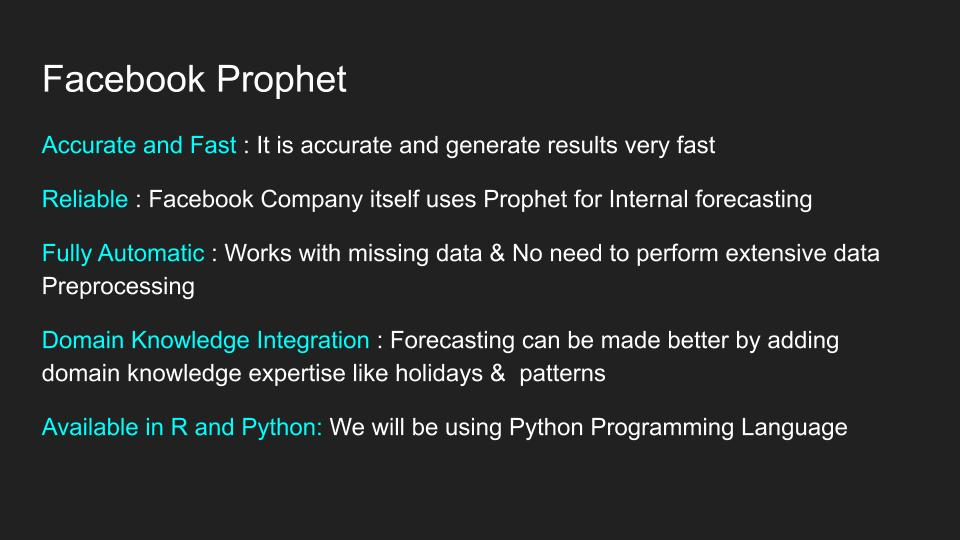

## Data Preperation

In [18]:
ndf = pd.DataFrame(df, columns=['Date', 'Close'])
ndf

,Date,Close
0,2023-04-24,162.550003
1,2023-04-25,160.669998
2,2023-04-26,153.750000
3,2023-04-27,160.190002
4,2023-04-28,164.309998
...,...,...
248,2024-04-18,149.929993
249,2024-04-19,147.050003
250,2024-04-22,142.050003
251,2024-04-23,144.679993


In [19]:
prophet_df = ndf.rename(columns={'Date':'ds', 'Close':'y'})
prophet_df

,ds,y
0,2023-04-24,162.550003
1,2023-04-25,160.669998
2,2023-04-26,153.750000
3,2023-04-27,160.190002
4,2023-04-28,164.309998
...,...,...
248,2024-04-18,149.929993
249,2024-04-19,147.050003
250,2024-04-22,142.050003
251,2024-04-23,144.679993


In [26]:
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])
prophet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      253 non-null    datetime64[ns]
 1   y       253 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB


## Creating Facebook Prophet Model

In [27]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gd9jq02/65vzdn80.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gd9jq02/joslqtjw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69476', 'data', 'file=/tmp/tmp5gd9jq02/65vzdn80.json', 'init=/tmp/tmp5gd9jq02/joslqtjw.json', 'output', 'file=/tmp/tmp5gd9jq02/prophet_modelg80tnd_l/prophet_model-20240424165600.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:56:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:56:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [28]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [29]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-04-24,154.566417,132.013287,170.367827,154.566417,154.566417,-2.189880,-2.189880,-2.189880,-2.189880,-2.189880,-2.189880,0.0,0.0,0.0,152.376537
1,2023-04-25,156.161642,136.895291,176.565425,156.161642,156.161642,-0.125413,-0.125413,-0.125413,-0.125413,-0.125413,-0.125413,0.0,0.0,0.0,156.036229
2,2023-04-26,157.756867,137.856620,177.020147,157.756867,157.756867,-0.570145,-0.570145,-0.570145,-0.570145,-0.570145,-0.570145,0.0,0.0,0.0,157.186722
3,2023-04-27,159.352091,137.266928,176.514896,159.352091,159.352091,-1.909341,-1.909341,-1.909341,-1.909341,-1.909341,-1.909341,0.0,0.0,0.0,157.442750
4,2023-04-28,160.947316,139.971366,178.103290,160.947316,160.947316,-2.403847,-2.403847,-2.403847,-2.403847,-2.403847,-2.403847,0.0,0.0,0.0,158.543469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2024-05-20,139.777547,118.540197,157.832280,137.379260,142.516241,-2.189880,-2.189880,-2.189880,-2.189880,-2.189880,-2.189880,0.0,0.0,0.0,137.587667
279,2024-05-21,139.161975,118.550776,158.353082,136.579591,142.039915,-0.125413,-0.125413,-0.125413,-0.125413,-0.125413,-0.125413,0.0,0.0,0.0,139.036561
280,2024-05-22,138.546402,118.031083,156.926317,135.878377,141.684438,-0.570145,-0.570145,-0.570145,-0.570145,-0.570145,-0.570145,0.0,0.0,0.0,137.976258
281,2024-05-23,137.930830,116.422432,155.603881,135.149111,141.266562,-1.909341,-1.909341,-1.909341,-1.909341,-1.909341,-1.909341,0.0,0.0,0.0,136.021489


In [30]:
px.line(forecast, x='ds', y='yhat')

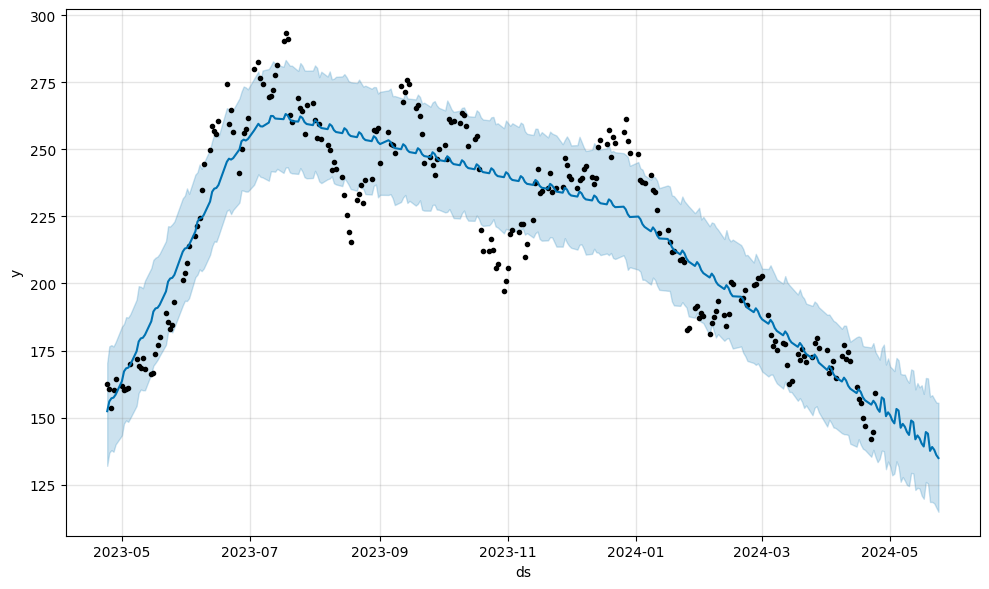

In [31]:
figure = m.plot(forecast, xlabel='ds', ylabel='y')

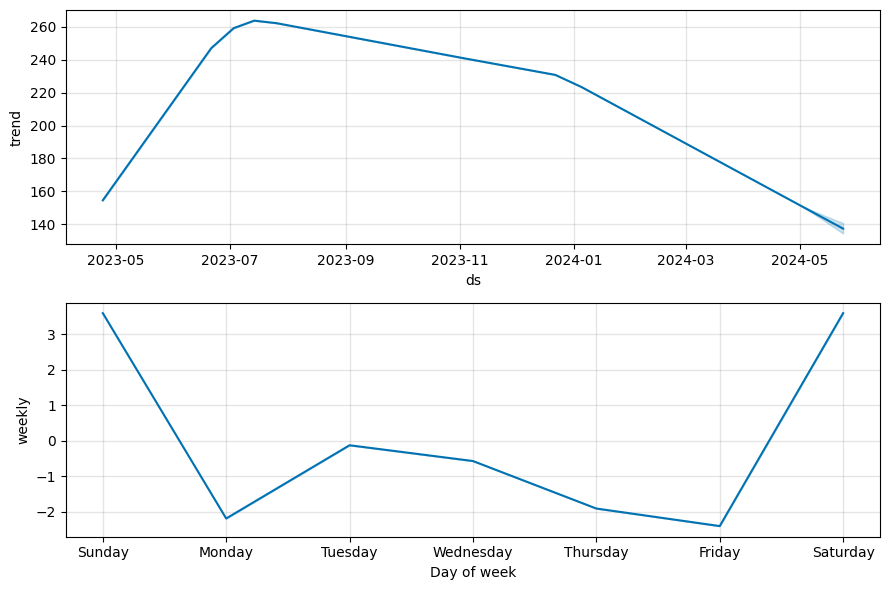

In [32]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [34]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>